In [1]:
!pip install fredapi pandas

from fredapi import Fred
import pandas as pd

fred = Fred(api_key="7dde09a72f1b71c95cc71a188f7e2ea1")

us_cpi_series = {
    'General index (All items)': 'CPIAUCSL',
    'Food & beverages': 'CPIUFDSL',
    'Cereals & bakery products': 'CUUR0000SAF11',
    'Meats, poultry, fish, eggs': 'CUUR0000SAF113',
    'Dairy & related products': 'CUUR0000SAF114',
    'Fats & oils': 'CUUR0000SAF115',
    'Fruits & vegetables': 'CUUR0000SAF116',
    'Shelter (Housing)': 'CUUR0000SAH1',
    'Fuel & light (Energy)': 'CUUR0000SEHF01',
    'Transportation': 'CUUR0000SAT1',
    'Apparel (Clothing & Footwear)': 'CUUR0000SAF1',
    'Medical care (Health)': 'CUUR0000SAM2',
    'Education & communication': 'CUUR0000SAE1',
    'Other goods & services': 'CUUR0000SAS4'
}

df_list = []
for label, code in us_cpi_series.items():
    try:
        s = fred.get_series(code)
        s = s.resample('M').last()
        s.name = label
        df_list.append(s)
    except Exception as e:
        print(f"⚠️ Error fetching {label} ({code}):", e)

us_cpi = pd.concat(df_list, axis=1)
us_cpi.index = us_cpi.index.to_period('M')
us_cpi.dropna(how='all', inplace=True)

# Add inflation metrics
us_cpi['Inflation_All (YoY, %)'] = us_cpi['General index (All items)'].pct_change(12) * 100
us_cpi['Food Inflation (YoY, %)'] = us_cpi['Food & beverages'].pct_change(12) * 100

# Export to CSV
us_cpi.to_csv("us_cpi_subcategories_final.csv")

print("✅ Successfully exported! Shape:", us_cpi.shape)
us_cpi.tail(10)


/tmp/ipython-input-4252007386.py:29: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  s = s.resample('M').last()


⚠️ Error fetching Apparel (Clothing & Footwear) (CUUR0000SAF1): Bad Request.  The series does not exist.
✅ Successfully exported! Shape: (1135, 15)


,General index (All items),Food & beverages,Cereals & bakery products,"Meats, poultry, fish, eggs",Dairy & related products,Fats & oils,Fruits & vegetables,Shelter (Housing),Fuel & light (Energy),Transportation,Medical care (Health),Education & communication,Other goods & services,"Inflation_All (YoY, %)","Food Inflation (YoY, %)"
2024-12,317.603,334.456,308.380,353.630,220.762,272.362,291.832,407.242,276.700,266.883,619.686,305.662,439.523,2.872366,2.454954
2025-01,319.086,335.671,310.936,355.837,225.510,273.796,292.771,409.153,281.888,269.887,621.661,305.860,445.853,2.999413,2.471495
2025-02,319.775,336.223,311.284,353.197,225.510,273.067,294.211,410.635,283.194,270.942,623.392,306.284,445.910,2.814270,2.568616
2025-03,319.615,337.686,312.815,350.379,226.835,275.216,294.847,411.990,285.983,270.344,626.888,306.847,442.901,2.405585,2.951793
2025-04,320.321,337.424,311.840,349.187,227.738,275.270,294.880,413.389,286.652,272.793,629.307,306.829,445.550,2.333747,2.743801
2025-05,320.580,338.386,312.491,351.335,226.252,276.606,294.478,414.689,290.055,272.979,630.162,307.504,447.544,2.375934,2.895422
2025-06,321.500,339.498,313.028,351.414,229.103,277.737,294.883,415.455,299.728,273.742,633.659,308.250,447.222,2.672683,2.987098
2025-07,322.132,339.652,313.263,351.764,228.011,277.002,295.176,416.271,299.107,274.289,637.425,309.439,446.417,2.731801,2.880579
2025-08,323.364,341.208,314.608,356.104,229.406,276.649,296.908,417.902,298.738,274.710,637.817,311.752,446.688,2.939220,3.194977
2025-09,324.368,342.054,316.042,358.019,231.144,277.710,297.507,418.598,296.887,274.710,639.215,314.267,447.451,3.022700,3.116521


In [2]:
us_cpi.describe()


,General index (All items),Food & beverages,Cereals & bakery products,"Meats, poultry, fish, eggs",Dairy & related products,Fats & oils,Fruits & vegetables,Shelter (Housing),Fuel & light (Energy),Transportation,Medical care (Health),Education & communication,Other goods & services,"Inflation_All (YoY, %)","Food Inflation (YoY, %)"
count,945.000000,945.000000,945.000000,1089.000000,945.000000,705.000000,758.000000,874.000000,1051.000000,993.000000,921.000000,393.000000,921.000000,933.000000,933.000000
mean,123.421543,125.153167,123.271757,125.977488,95.817254,139.836420,150.103611,147.605728,100.270364,104.921008,202.529549,187.390628,144.792908,3.522983,3.516063
std,88.823908,90.481242,85.663636,111.034972,62.782567,66.312223,77.128273,110.830116,74.136798,74.915285,193.448438,71.990289,115.445181,2.874934,3.583088
min,21.480000,22.800000,24.300000,9.800000,11.400000,29.200000,39.300000,21.600000,26.500000,14.500000,8.200000,76.500000,11.700000,-2.988129,-7.116105
25%,32.750000,33.800000,35.100000,27.900000,24.200000,95.300000,73.825000,36.600000,29.900000,31.800000,27.400000,116.100000,33.700000,1.666667,1.617562
50%,109.500000,108.200000,106.100000,82.100000,105.900000,142.900000,151.200000,131.500000,91.800000,101.100000,129.000000,187.853000,120.900000,2.862986,2.743801
75%,199.300000,193.600000,191.700000,224.000000,146.300000,192.492000,222.282250,241.737500,141.650000,161.900000,351.200000,252.115000,231.367000,4.438642,4.556962
max,324.368000,342.054000,316.042000,358.019000,231.144000,277.737000,297.507000,418.598000,299.728000,282.398000,639.215000,314.267000,447.544000,14.592275,20.179372


In [3]:
us_cpi.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 1135 entries, 1913-12 to 2025-09
Freq: M
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   General index (All items)   945 non-null    float64
 1   Food & beverages            945 non-null    float64
 2   Cereals & bakery products   945 non-null    float64
 3   Meats, poultry, fish, eggs  1089 non-null   float64
 4   Dairy & related products    945 non-null    float64
 5   Fats & oils                 705 non-null    float64
 6   Fruits & vegetables         758 non-null    float64
 7   Shelter (Housing)           874 non-null    float64
 8   Fuel & light (Energy)       1051 non-null   float64
 9   Transportation              993 non-null    float64
 10  Medical care (Health)       921 non-null    float64
 11  Education & communication   393 non-null    float64
 12  Other goods & services      921 non-null    float64
 13  Inflation_All (

In [4]:
us_cpi.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 1135 entries, 1913-12 to 2025-09
Freq: M
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   General index (All items)   945 non-null    float64
 1   Food & beverages            945 non-null    float64
 2   Cereals & bakery products   945 non-null    float64
 3   Meats, poultry, fish, eggs  1089 non-null   float64
 4   Dairy & related products    945 non-null    float64
 5   Fats & oils                 705 non-null    float64
 6   Fruits & vegetables         758 non-null    float64
 7   Shelter (Housing)           874 non-null    float64
 8   Fuel & light (Energy)       1051 non-null   float64
 9   Transportation              993 non-null    float64
 10  Medical care (Health)       921 non-null    float64
 11  Education & communication   393 non-null    float64
 12  Other goods & services      921 non-null    float64
 13  Inflation_All (

In [5]:
temp = us_cpi.ffill().bfill()
#That ensures no data loss, while keeping realistic continuity between months.

In [6]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 1135 entries, 1913-12 to 2025-09
Freq: M
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   General index (All items)   1135 non-null   float64
 1   Food & beverages            1135 non-null   float64
 2   Cereals & bakery products   1135 non-null   float64
 3   Meats, poultry, fish, eggs  1135 non-null   float64
 4   Dairy & related products    1135 non-null   float64
 5   Fats & oils                 1135 non-null   float64
 6   Fruits & vegetables         1135 non-null   float64
 7   Shelter (Housing)           1135 non-null   float64
 8   Fuel & light (Energy)       1135 non-null   float64
 9   Transportation              1135 non-null   float64
 10  Medical care (Health)       1135 non-null   float64
 11  Education & communication   1135 non-null   float64
 12  Other goods & services      1135 non-null   float64
 13  Inflation_All (

In [7]:
print(us_cpi.columns.tolist())

['General index (All items)', 'Food & beverages', 'Cereals & bakery products', 'Meats, poultry, fish, eggs', 'Dairy & related products', 'Fats & oils', 'Fruits & vegetables', 'Shelter (Housing)', 'Fuel & light (Energy)', 'Transportation', 'Medical care (Health)', 'Education & communication', 'Other goods & services', 'Inflation_All (YoY, %)', 'Food Inflation (YoY, %)']


In [8]:
us_cpi.index.year

Index([1913, 1914, 1915, 1916, 1917, 1918, 1918, 1919, 1919, 1920,
       ...
       2024, 2025, 2025, 2025, 2025, 2025, 2025, 2025, 2025, 2025],
      dtype='int64', length=1135)

In [9]:
us_cpi.index.month

Index([12, 12, 12, 12, 12,  6, 12,  6, 12,  6,
       ...
       12,  1,  2,  3,  4,  5,  6,  7,  8,  9],
      dtype='int64', length=1135)

Numeric columns detected: ['General index (All items)', 'Food & beverages', 'Cereals & bakery products', 'Meats, poultry, fish, eggs', 'Dairy & related products', 'Fats & oils', 'Fruits & vegetables', 'Shelter (Housing)', 'Fuel & light (Energy)', 'Transportation', 'Medical care (Health)', 'Education & communication', 'Other goods & services', 'Inflation_All (YoY, %)', 'Food Inflation (YoY, %)']
Plotting seasonality for: ['General index (All items)', 'Medical care (Health)', 'Other goods & services', 'Meats, poultry, fish, eggs']


/tmp/ipython-input-796677937.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly = df.groupby("Month")[col].mean().reindex(month_names)


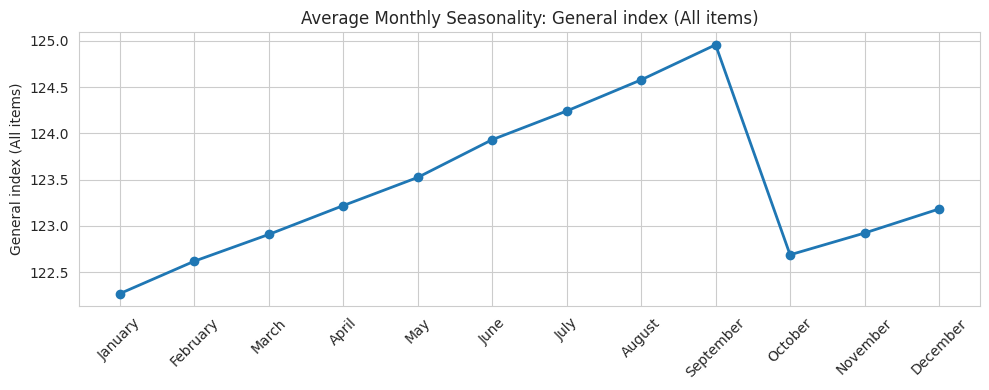

/tmp/ipython-input-796677937.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly = df.groupby("Month")[col].mean().reindex(month_names)


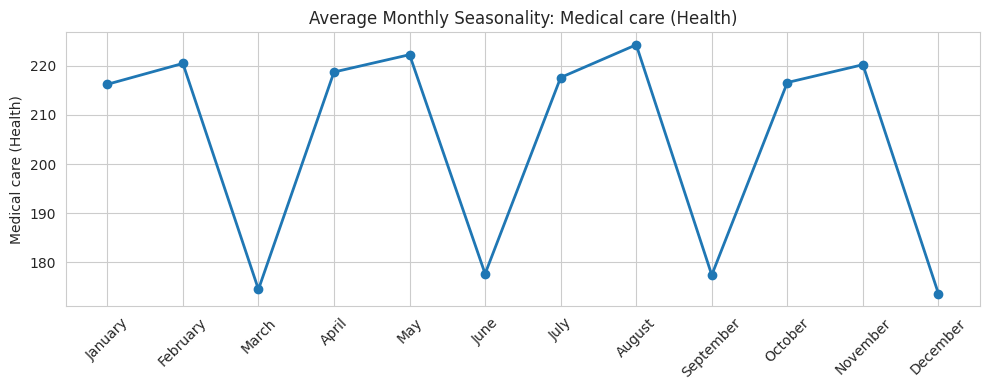

/tmp/ipython-input-796677937.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly = df.groupby("Month")[col].mean().reindex(month_names)


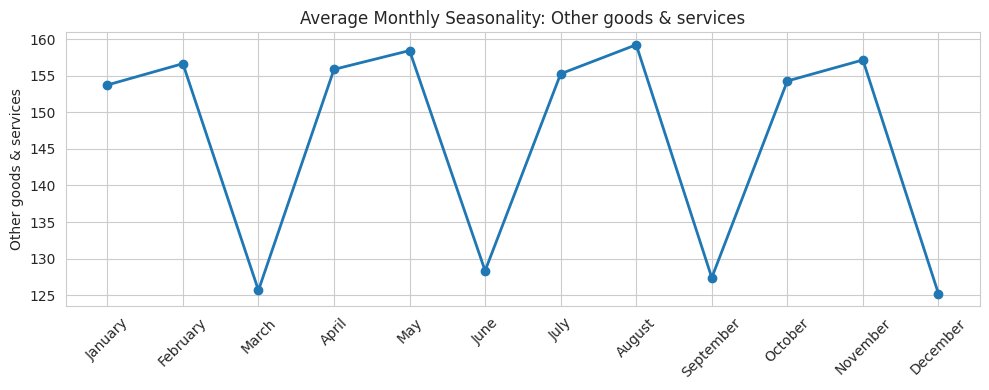

/tmp/ipython-input-796677937.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly = df.groupby("Month")[col].mean().reindex(month_names)


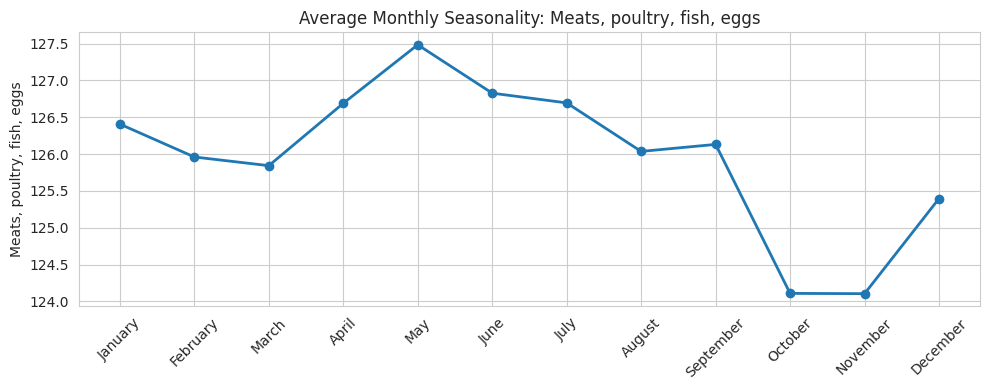

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import calendar

# --- STYLE ---
sns.set_style("whitegrid")
OUT_DIR = Path("/content/us_cpi_plots")
OUT_DIR.mkdir(exist_ok=True)

# --- LOAD ---
DATA_CSV = "/content/us_cpi_subcategories_final.csv"  # change this path

df = pd.read_csv(DATA_CSV, index_col=0)  # ✅ Date is used as index
df.index = pd.to_datetime(df.index, errors='coerce')
df = df.sort_index()

# --- ADD YEAR & MONTH ---
df["Year"] = df.index.year
df["Month"] = df.index.month_name()

# --- ENSURE ORDERED MONTHS ---
month_names = list(calendar.month_name)[1:]
df["Month"] = pd.Categorical(df["Month"], categories=month_names, ordered=True)

# --- DETECT NUMERIC COLUMNS ---
id_cols = ["Year", "Month"]
num_cols = [c for c in df.columns if c not in id_cols and pd.api.types.is_numeric_dtype(df[c])]
print("Numeric columns detected:", num_cols)

# --- PICK GENERAL INDEX + TOP VARIANCE COMPONENTS ---
general_col = "General index (All items)"
var_scores = df[num_cols].var().sort_values(ascending=False)
top_cats = var_scores.index.drop(general_col, errors='ignore').tolist()[:3]
plot_cols = [general_col] + top_cats
print("Plotting seasonality for:", plot_cols)

# --- MONTHLY SEASONALITY PLOTS ---
for col in plot_cols:
    plt.figure(figsize=(10, 4))
    monthly = df.groupby("Month")[col].mean().reindex(month_names)
    plt.plot(month_names, monthly.values, marker='o', linewidth=2)
    plt.title(f"Average Monthly Seasonality: {col}")
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(OUT_DIR / f"seasonality_{col.replace(' ','_')}.png", bbox_inches="tight", dpi=200)
    plt.show()


/tmp/ipython-input-4068724654.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly = df.groupby("Month")['General index (All items)'].mean().reindex(month_names)


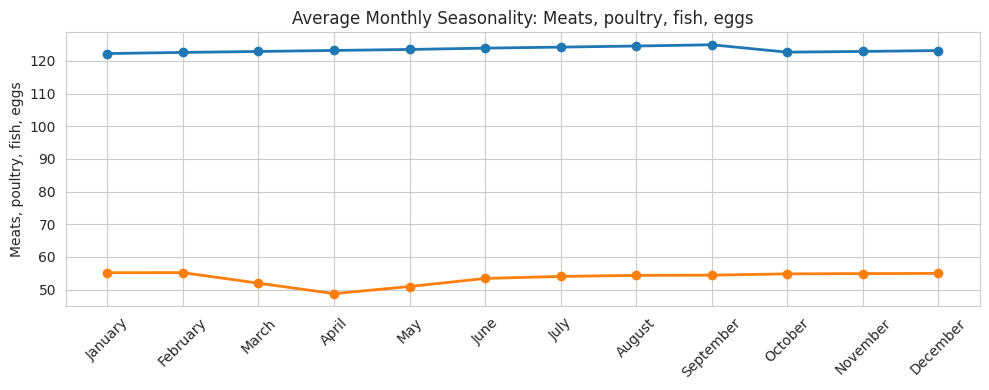

In [15]:
plt.figure(figsize=(10, 4))
monthly = df.groupby("Month")['General index (All items)'].mean().reindex(month_names)
df2 = pd.read_csv('in.csv')
m2 = df2.groupby('Month')['General index'].mean().reindex(month_names)
plt.plot(month_names, monthly.values, marker='o', linewidth=2)
plt.plot(month_names,m2.values, marker='o', linewidth=2)
plt.title(f"Average Monthly Seasonality: {col}")
plt.ylabel(col)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(OUT_DIR / f"seasonality_{col.replace(' ','_')}.png", bbox_inches="tight", dpi=200)
plt.show()

In [16]:
a = df.groupby("Month")['General index (All items)'].mean().reindex(month_names).pct_change() * 100
b = df2.groupby("Month")['General index'].mean().reindex(month_names).pct_change() * 100


/tmp/ipython-input-3300917460.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  a = df.groupby("Month")['General index (All items)'].mean().reindex(month_names).pct_change() * 100


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

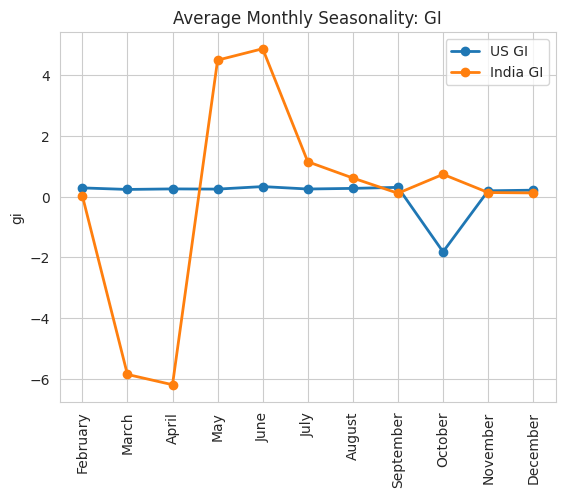

In [18]:
plt.plot(month_names, a.values, marker='o', linewidth=2,label="US GI")
plt.plot(month_names,b.values, marker='o', linewidth=2,label="India GI")
plt.legend()
plt.title(f"Average Monthly Seasonality: GI")
plt.ylabel("gi")
plt.xticks(rotation=90)

In [19]:
!pip install fredapi
from fredapi import Fred
import pandas as pd

fred = Fred(api_key="7dde09a72f1b71c95cc71a188f7e2ea1")

# Define series for Euro Area HICP
euro_series = {
    'General index (All items)': 'CP0000EZ19M086NEST',
    # optional / check availability:
    'Education': 'CP1000EZ19M086NEST',
    'Core (excl energy, food, etc.)': '00XEFDEZ19M086NEST',
    'Energy': 'ENRGY0EZ19M086NEST',  # check if this works
    # more subseries if available
}

# Fetch data
df_list = []
for label, code in euro_series.items():
    try:
        s = fred.get_series(code)
        s = s.resample('M').last()
        s.name = label
        df_list.append(s)
    except Exception as e:
        print(f"⚠️ Error fetching {label} ({code}):", e)

euro_cpi = pd.concat(df_list, axis=1)
euro_cpi.index = euro_cpi.index.to_period('M')
euro_cpi.dropna(how='all', inplace=True)

# Add YoY inflation columns
euro_cpi['Inflation_All (YoY, %)'] = euro_cpi['General index (All items)'].pct_change(12) * 100

# Export
euro_cpi.to_csv("euro_area_hicp.csv")
print("Exported:", euro_cpi.shape)
euro_cpi.tail()


/tmp/ipython-input-1002317659.py:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  s = s.resample('M').last()


Exported: (357, 5)


,General index (All items),Education,"Core (excl energy, food, etc.)",Energy,"Inflation_All (YoY, %)"
2025-05,128.65,112.34,122.15,143.48,1.876782
2025-06,129.04,112.38,122.61,143.81,1.967602
2025-07,129.04,112.50,122.40,145.29,2.007905
2025-08,129.24,112.62,122.76,144.32,2.028894
2025-09,129.37,114.53,122.95,144.21,2.220291


In [20]:
euro_cpi

,General index (All items),Education,"Core (excl energy, food, etc.)",Energy,"Inflation_All (YoY, %)"
1996-01,70.40,58.45,NaN,NaN,NaN
1996-02,70.71,58.61,NaN,NaN,NaN
1996-03,71.01,58.62,NaN,NaN,NaN
1996-04,71.14,58.65,NaN,NaN,NaN
1996-05,71.32,58.64,NaN,NaN,NaN
...,...,...,...,...,...
2025-05,128.65,112.34,122.15,143.48,1.876782
2025-06,129.04,112.38,122.61,143.81,1.967602
2025-07,129.04,112.50,122.40,145.29,2.007905
2025-08,129.24,112.62,122.76,144.32,2.028894


In [21]:
euro_cpi.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 357 entries, 1996-01 to 2025-09
Freq: M
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   General index (All items)       357 non-null    float64
 1   Education                       357 non-null    float64
 2   Core (excl energy, food, etc.)  298 non-null    float64
 3   Energy                          310 non-null    float64
 4   Inflation_All (YoY, %)          345 non-null    float64
dtypes: float64(5)
memory usage: 16.7 KB


In [22]:
t3 = euro_cpi.ffill().bfill()

In [23]:
t3.head()

,General index (All items),Education,"Core (excl energy, food, etc.)",Energy,"Inflation_All (YoY, %)"
1996-01,70.40,58.45,80.64,57.45,2.201705
1996-02,70.71,58.61,80.64,57.45,2.201705
1996-03,71.01,58.62,80.64,57.45,2.201705
1996-04,71.14,58.65,80.64,57.45,2.201705
1996-05,71.32,58.64,80.64,57.45,2.201705


In [24]:
t3.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 357 entries, 1996-01 to 2025-09
Freq: M
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   General index (All items)       357 non-null    float64
 1   Education                       357 non-null    float64
 2   Core (excl energy, food, etc.)  357 non-null    float64
 3   Energy                          357 non-null    float64
 4   Inflation_All (YoY, %)          357 non-null    float64
dtypes: float64(5)
memory usage: 16.7 KB


In [25]:
euro_cpi = pd.read_csv("/content/euro_area_hicp.csv", index_col=0, parse_dates=True)


In [27]:
t3 = euro_cpi.ffill().bfill()


In [28]:
print(t3.index)

DatetimeIndex(['1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01',
               ...
               '2024-12-01', '2025-01-01', '2025-02-01', '2025-03-01',
               '2025-04-01', '2025-05-01', '2025-06-01', '2025-07-01',
               '2025-08-01', '2025-09-01'],
              dtype='datetime64[ns]', length=357, freq=None)


          date  General index (All items)  Education  \
0   1996-01-01                      70.40      58.45   
1   1996-02-01                      70.71      58.61   
2   1996-03-01                      71.01      58.62   
3   1996-04-01                      71.14      58.65   
4   1996-05-01                      71.32      58.64   
..         ...                        ...        ...   
352 2025-05-01                     128.65     112.34   
353 2025-06-01                     129.04     112.38   
354 2025-07-01                     129.04     112.50   
355 2025-08-01                     129.24     112.62   
356 2025-09-01                     129.37     114.53   

     Core (excl energy, food, etc.)  Energy  Inflation_All (YoY, %)  
0                             80.64   57.45                2.201705  
1                             80.64   57.45                2.201705  
2                             80.64   57.45                2.201705  
3                             80.64   57.45    

/tmp/ipython-input-2581655196.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly = df.groupby('Month')[col].mean().reindex(month_names)
/tmp/ipython-input-2581655196.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly = df.groupby('Month')[col].mean().reindex(month_names)
/tmp/ipython-input-2581655196.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly = df.groupby('Month')[col].mean().reindex

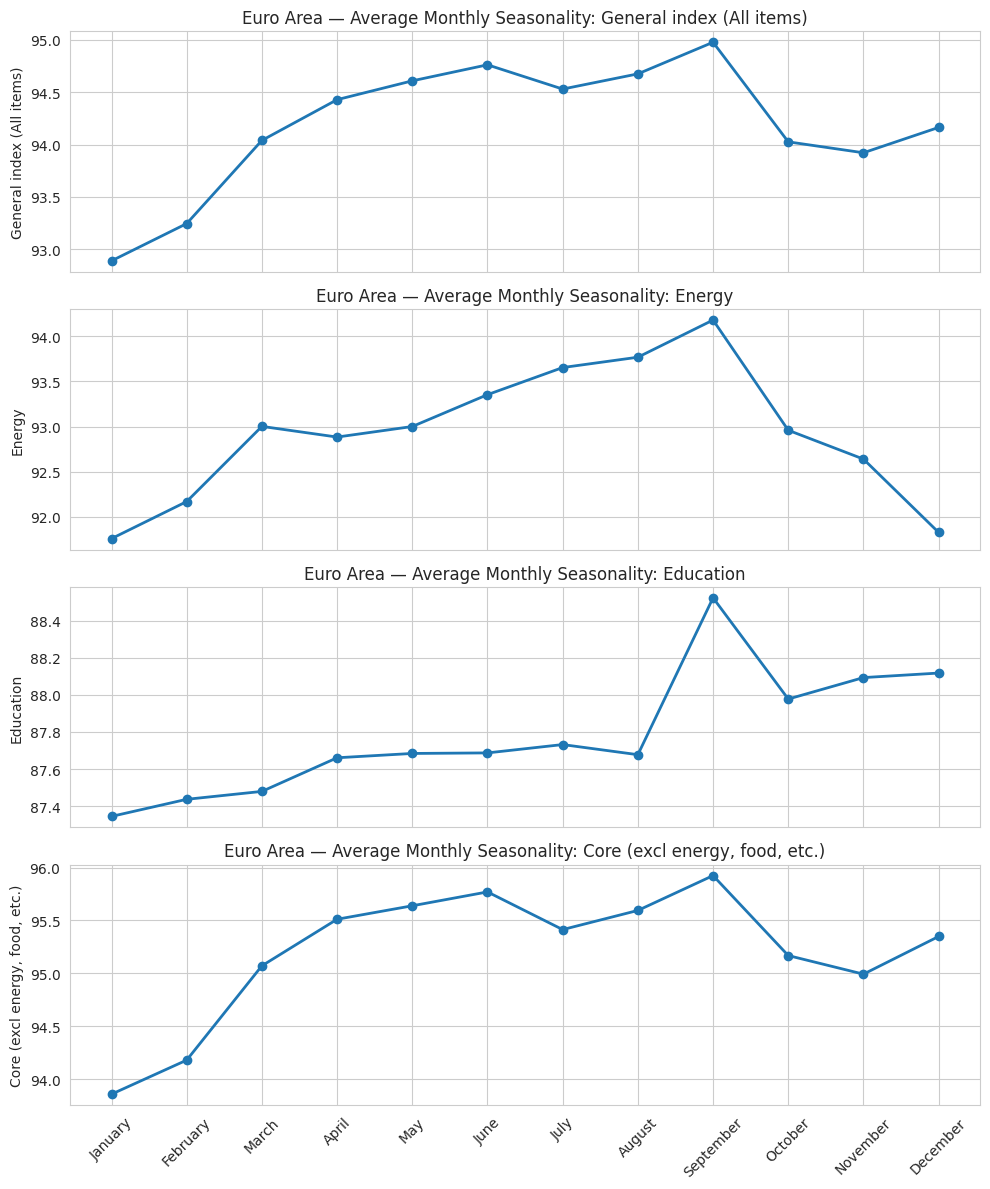

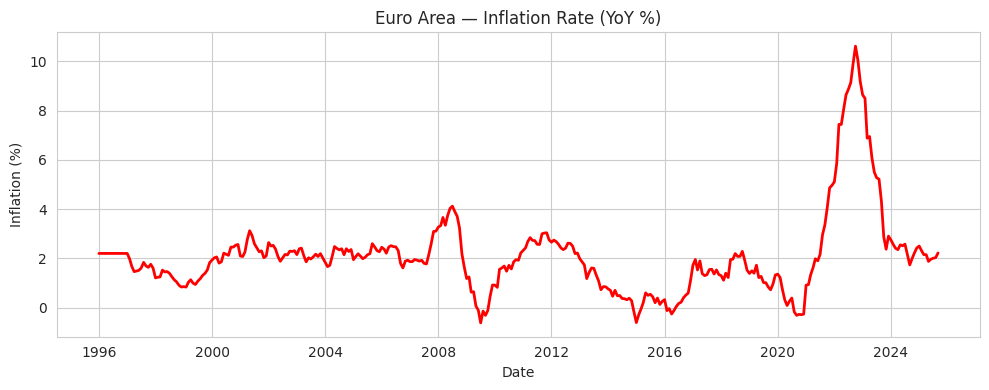

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import calendar

sns.set_style("whitegrid")

# Path to your Euro Area HICP CSV
DATA_CSV = "/content/euro_area_hicp.csv"
OUT_DIR = Path("/content/eda_plots_euro")
OUT_DIR.mkdir(exist_ok=True)

# --- Load ---
df =t3
df = df.reset_index().rename(columns={"index": "date"})
print(df)
df['Month'] = df['date'].dt.month_name()
df['Year'] = df['date'].dt.year

# --- Order months ---
month_names = list(calendar.month_name)[1:]
df['Month'] = pd.Categorical(df['Month'], categories=month_names, ordered=True)

# --- Identify numeric columns ---
id_cols = ['Year', 'Month', 'date']
num_cols = [c for c in df.columns if c not in id_cols and pd.api.types.is_numeric_dtype(df[c])]
if 'General index (All items)' in df.columns and 'General index (All items)' not in num_cols:
    num_cols = ['General index (All items)'] + [c for c in num_cols if c != 'General index (All items)']

print("Numeric columns detected:", num_cols)

# --- Select top variables by variance ---
var_scores = df[num_cols].var().sort_values(ascending=False)
top_cats = var_scores.index.drop('General index (All items)', errors='ignore').tolist()[:3]
plot_cols = ['General index (All items)'] + top_cats
print("Plotting:", plot_cols)

# --- Monthly seasonality plot ---
fig, axes = plt.subplots(len(plot_cols), 1, figsize=(10, 3 * len(plot_cols)), sharex=True)

for i, col in enumerate(plot_cols):
    monthly = df.groupby('Month')[col].mean().reindex(month_names)
    ax = axes[i] if len(plot_cols) > 1 else axes
    ax.plot(month_names, monthly.values, marker='o', linewidth=2)
    ax.set_title(f"Euro Area — Average Monthly Seasonality: {col}")
    ax.set_ylabel(col)
    ax.set_xticks(month_names)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig(OUT_DIR / "seasonality_euro_area.png", bbox_inches="tight", dpi=200)
plt.show()

# --- Inflation trend plot ---
if 'Inflation_All (YoY, %)' in df.columns:
    plt.figure(figsize=(10, 4))
    plt.plot(df['date'], df['Inflation_All (YoY, %)'], color='red', linewidth=2)
    plt.title("Euro Area — Inflation Rate (YoY %)")
    plt.xlabel("Date")
    plt.ylabel("Inflation (%)")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(OUT_DIR / "inflation_trend_euro_area.png", bbox_inches="tight", dpi=200)
    plt.show()
else:
    print("⚠️ Column 'Inflation_All (YoY, %)' not found — skipping inflation trend plot.")


Comparing us to europe

/tmp/ipython-input-3014757634.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  us_cpi = us_cpi.resample('M').mean()
/tmp/ipython-input-3014757634.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  euro_cpi = euro_cpi.resample('M').mean()


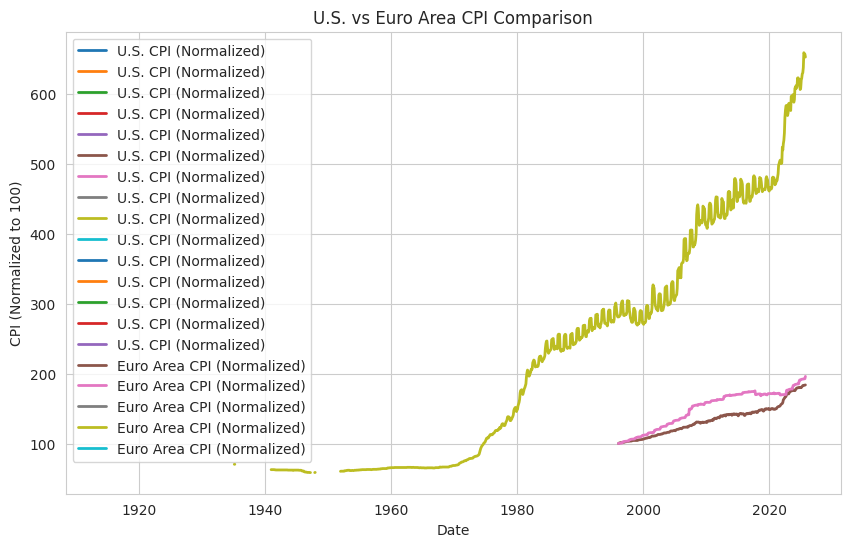

In [30]:
import matplotlib.pyplot as plt
us_cpi = pd.read_csv("/content/us_cpi_subcategories_final.csv", index_col=0, parse_dates=True)
euro_cpi = pd.read_csv("/content/euro_area_hicp.csv", index_col=0, parse_dates=True)
# Ensure both have consistent frequency (monthly)
us_cpi = us_cpi.resample('M').mean()
euro_cpi = euro_cpi.resample('M').mean()

# Normalize both to 100 for comparison of relative change
us_norm = us_cpi / us_cpi.iloc[0] * 100
euro_norm = euro_cpi / euro_cpi.iloc[0] * 100

plt.figure(figsize=(10,6))
plt.plot(us_norm.index, us_norm.values, label='U.S. CPI (Normalized)', linewidth=2)
plt.plot(euro_norm.index, euro_norm.values, label='Euro Area CPI (Normalized)', linewidth=2)

plt.title('U.S. vs Euro Area CPI Comparison')
plt.xlabel('Date')
plt.ylabel('CPI (Normalized to 100)')
plt.legend()
plt.grid(True)
plt.show()
